#### Get average number of heavy atoms and split tha dataset

In [31]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd
from rdkit.Chem import rdMolDescriptors as rdescriptors
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys    
import pubchempy as pcp
import warnings
warnings.filterwarnings('ignore')
from rdkit import RDLogger 
RDLogger.DisableLog('rdApp.*')
import pandas as pd
import seaborn as sns

In [17]:
#Loading zinc database from csv 
suppl_csv = pd.read_csv('../data/ZINCECFP.csv', delimiter = ' ')
suppl_csv

,Zinc_id,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset
0,1589384,N=C(N)NCC[C@H](N)C(=O)O,160.096026,-1.72853,IFPQOXNWLSRZKX-VKHMYHEASA-N,IFPQOXNWLSRZKX,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 80, 140, 197, 389, 623, 650, 667, 739, 786..."
1,83822513,CN(C)CC(=O)NCC(=O)O,160.084792,-1.25120,HQFNONZTUQSPJS-UHFFFAOYSA-N,HQFNONZTUQSPJS,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[41, 80, 197, 339, 389, 390, 650, 652, 807, 88..."
2,214763687,O=C(O)CN1CCCNS1(=O)=O,194.036128,-1.38890,KCIDTUHJDPZBTQ-UHFFFAOYSA-N,KCIDTUHJDPZBTQ,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[80, 187, 190, 207, 305, 307, 389, 469, 650, 8..."
3,306392345,O=C(O)[C@@H]1C[C@H]2O[C@H]1[C@H](O)[C@H]2O,174.052823,-1.41990,ZZTJOHOETCDWML-VFUOTHLCSA-N,ZZTJOHOETCDWML,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[209, 221, 285, 389, 650, 656, 807, 926, 1017,..."
4,85343607,N[C@@H]1N=C2N=C(O)N=C2C(=O)N1,167.044324,-1.87440,OSXQHYVRCFCLQV-SCSAIBSYSA-N,OSXQHYVRCFCLQV,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[15, 106, 301, 314, 378, 584, 650, 664, 724, 7..."
...,...,...,...,...,...,...,...,...,...
379007,97986502,Cc1ccc(C(=O)N(c2ccc(N(C(=O)c3ccc(C)cc3)S(=O)(=...,636.051720,6.49784,KYPDAVIHIYTGQW-UHFFFAOYSA-N,KYPDAVIHIYTGQW,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[14, 234, 235, 241, 350, 383, 517, 587, 650, 6..."
379008,97948800,CCc1c(-c2ccc(OC)c(OC)c2)nn(-c2nc(-c3ccc(C)cc3)...,604.229740,7.58732,AWQWFNRTEBAZJO-UHFFFAOYSA-N,AWQWFNRTEBAZJO,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[80, 94, 114, 121, 140, 208, 235, 249, 289, 29..."
379009,54274624,Cc1cc(N2CCN(CCOc3cccc4ccccc34)CC2)n2nc(C)c(-c3...,511.213888,6.02074,HAHVCBFPDRUVIL-UHFFFAOYSA-N,HAHVCBFPDRUVIL,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[13, 74, 80, 92, 140, 212, 216, 262, 296, 378,..."
379010,2093448,CCOc1cc(CNc2cc(Cl)ccc2C)cc(I)c1OCc1ccccc1Cl,541.007232,7.49622,IYFPBZIIJDRXMB-UHFFFAOYSA-N,IYFPBZIIJDRXMB,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[80, 99, 165, 216, 237, 255, 294, 295, 333, 36..."


In [18]:
# List of ECFP of zinc products
ligandm_database = []
for ligand in suppl_csv["Smiles"]:
		ligandm_database.append(Chem.MolFromSmiles(ligand))

In [20]:
zinc_atomcount = [l.GetNumHeavyAtoms() for l in ligandm_database]
suppl_csv["Atomcount"] = zinc_atomcount
suppl_csv

<AxesSubplot:>

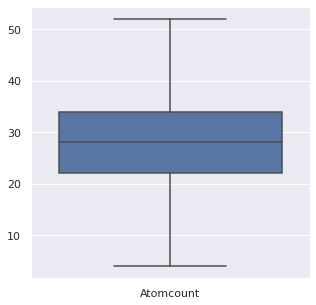

In [32]:
sns.set(rc={'figure.figsize':(5, 5)}) #
sns.boxplot(data=suppl_csv[['Atomcount']], showfliers = False)

In [34]:
suppl_csv['Atomcount'].describe()

count    379012.000000
mean         28.009868
std           8.643746
min           4.000000
25%          22.000000
50%          28.000000
75%          34.000000
max          77.000000
Name: Atomcount, dtype: float64

### COCONUT heavy atoms

In [41]:
#Loading coconut database from csv 
suppl_coco = pd.read_csv('../data/COCOECFP.csv', delimiter = ' ')
suppl_coco.head(5)

,Coconut_id,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset
0,CNP0000002,CC=C(N=CS)C(=O)OC1C(COC(C)=O)OC(C2(O)CC(=O)C(N...,660.183639,-2.08210,FJEMIESGEMWDOB-UHFFFAOYSA-N,FJEMIESGEMWDOB,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[39, 58, 80, 118, 140, 144, 147, 209, 229, 252..."
1,CNP0000003,COc1cc(C)cc2c1C(=O)OC1C(O)C=CC3c4c(cc(OC)c5c4C...,598.183897,3.63422,KLWKJVYCDFWQMK-UHFFFAOYSA-N,KLWKJVYCDFWQMK,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[77, 94, 249, 314, 467, 495, 497, 569, 587, 64..."
2,CNP0000004,COc1cc(C)cc2c1C(=O)OC1C(O)C=CC3c4c(cc(OC)c5c4C...,554.157682,3.32262,PTEKHLCNKCAXPH-UHFFFAOYSA-N,PTEKHLCNKCAXPH,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[77, 249, 298, 314, 352, 467, 497, 569, 587, 6..."
3,CNP0000005,CC1(C)CC2C(OC(=O)c3ccccc3)C(OC(=O)c3ccccc3)CC(...,534.298139,6.87940,ZVAVQCZAGOKAMX-UHFFFAOYSA-N,ZVAVQCZAGOKAMX,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[13, 70, 80, 114, 145, 147, 207, 270, 302, 341..."
4,CNP0000006,COc1cc(C)cc2c1C(=O)OC1C(O)C=CC3c4c(cc(O)c5c4C(...,540.142032,3.01962,UYIPOCQHTAYRMA-UHFFFAOYSA-N,UYIPOCQHTAYRMA,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[77, 249, 298, 314, 352, 410, 457, 467, 497, 5..."


In [42]:
# List of ECFP of coco products
ligandm_database = []
for ligand in suppl_coco["Smiles"]:
		ligandm_database.append(Chem.MolFromSmiles(ligand))

In [43]:
coco_atomcount = [l.GetNumHeavyAtoms() for l in ligandm_database]
suppl_coco["Atomcount"] = coco_atomcount
suppl_coco

,Coconut_id,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset,Atomcount
0,CNP0000002,CC=C(N=CS)C(=O)OC1C(COC(C)=O)OC(C2(O)CC(=O)C(N...,660.183639,-2.08210,FJEMIESGEMWDOB-UHFFFAOYSA-N,FJEMIESGEMWDOB,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[39, 58, 80, 118, 140, 144, 147, 209, 229, 252...",45
1,CNP0000003,COc1cc(C)cc2c1C(=O)OC1C(O)C=CC3c4c(cc(OC)c5c4C...,598.183897,3.63422,KLWKJVYCDFWQMK-UHFFFAOYSA-N,KLWKJVYCDFWQMK,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[77, 94, 249, 314, 467, 495, 497, 569, 587, 64...",44
2,CNP0000004,COc1cc(C)cc2c1C(=O)OC1C(O)C=CC3c4c(cc(OC)c5c4C...,554.157682,3.32262,PTEKHLCNKCAXPH-UHFFFAOYSA-N,PTEKHLCNKCAXPH,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[77, 249, 298, 314, 352, 467, 497, 569, 587, 6...",41
3,CNP0000005,CC1(C)CC2C(OC(=O)c3ccccc3)C(OC(=O)c3ccccc3)CC(...,534.298139,6.87940,ZVAVQCZAGOKAMX-UHFFFAOYSA-N,ZVAVQCZAGOKAMX,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[13, 70, 80, 114, 145, 147, 207, 270, 302, 341...",39
4,CNP0000006,COc1cc(C)cc2c1C(=O)OC1C(O)C=CC3c4c(cc(O)c5c4C(...,540.142032,3.01962,UYIPOCQHTAYRMA-UHFFFAOYSA-N,UYIPOCQHTAYRMA,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[77, 249, 298, 314, 352, 410, 457, 467, 497, 5...",40
...,...,...,...,...,...,...,...,...,...,...
386292,CNP0436851,COc1cccc2ccc(C(C)=O)c(O)c12,216.078644,2.75660,XNWOWNYWQOTWIX-UHFFFAOYSA-N,XNWOWNYWQOTWIX,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[67, 202, 203, 230, 249, 650, 695, 725, 806, 8...",16
386293,CNP0436852,COc1cc(OC)c2c(c1)C(OC)(c1ccc3c(c1O)C(=O)c1c(O)...,570.188983,4.77902,XWGVAZYMLDVIDS-UHFFFAOYSA-N,XWGVAZYMLDVIDS,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[5, 67, 84, 142, 148, 202, 206, 231, 249, 253,...",42
386294,CNP0436853,CC1(C)C=Cc2cc(C3COc4c5c(cc(O)c4C3=O)OC(C)(C)C=...,420.157288,4.82510,XZXMEYSQXQNHCX-UHFFFAOYSA-N,XZXMEYSQXQNHCX,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 6, 53, 56, 84, 212, 276, 294, 314, 398, 43...",31
386295,CNP0436854,CCCCCCCC1CC(=O)NC(CO)C(=O)NC(CO)C(=O)N2CCCC2C(...,1183.685261,-1.20930,YNLIJTVZSFUHKP-UHFFFAOYSA-N,YNLIJTVZSFUHKP,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 5, 19, 42, 80, 109, 115, 130, 222, 231, 23...",84


<AxesSubplot:>

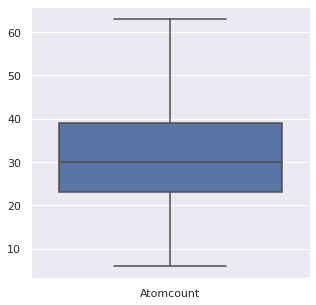

In [45]:
sns.set(rc={'figure.figsize':(5, 5)}) #
sns.boxplot(data=suppl_coco[['Atomcount']], showfliers = False)

In [46]:
suppl_coco['Atomcount'].describe()

count    386297.000000
mean         34.161340
std          18.535634
min           6.000000
25%          23.000000
50%          30.000000
75%          39.000000
max         209.000000
Name: Atomcount, dtype: float64